#Name: Purvik S Nukal
#SRN: PES1UG20CS315
## PES University, Bangalore
### Established under Karnataka Act No. 16 of 2013
#### UE20CS312 - Data Analytics - Worksheet 3b - AR and MA models


### AR and MA models
Auto Regressive and Moving Average are some of the most powerful, yet simple models for time-series forecasting. They can be used individually or together as ARMA. There are many other variations as well. We will use these models to forecast time-series in this worksheet

### Task
Cryptocurrency is all the rage now and it uses the very exciting technology behind blockchain. People even claim it to be revolutionary. But if you have invested in cryptocurrencies, you know how volatile these cryptocurrencies really are! People have become billionaires by investing in crypto, and others have lost all their money on crypto. The most recent instance of this volatility was seen during the Terra Luna crash. Find more info about that [here](https://www.forbes.com/sites/lawrencewintermeyer/2022/05/25/from-hero-to-zero-how-terra-was-toppled-in-cryptos-darkest-hour/?sh=5a7e83bf389e) and [here](https://c.ndtvimg.com/2021-02/4lo9ita_elon-musk-dogecoin-meme_625x300_04_February_21.jpg) if you are interested.

Your task is to effectively forecast the prices of **DogeCoin**, a crypto that started as a meme but now is a crypto that people actually invest in. DogeCoin prices however, are affected even by a single tweet by Elon Musk. The image below tweeted by Elon Musk shot up the prices of DogeCoin by 200%!

<!-- ![image](https://c.ndtvimg.com/2021-02/4lo9ita_elon-musk-dogecoin-meme_625x300_04_February_21.jpg =100x100) -->
<img src="https://c.ndtvimg.com/2021-02/4lo9ita_elon-musk-dogecoin-meme_625x300_04_February_21.jpg" width="300" height="200" />

You have been provided with the daily prices of DogeCoin from `15-08-2021` to `15-08-2022` a period of 1 year (365 days) in the file `doge.csv`

Please download the data from this [Github repo](https://github.com/Data-Analytics-UE20CS312/Unit-3-Worksheets/blob/master/3b%20-%20AR%20and%20MA%20models/doge.csv)


### Data Dictionary

Date - Date on which price was recorded     
Price - Price of DogeCoin on a particular day

### Data Ingestion and Preprocessing
- Read the file into a `Pandas` DataFrame object

In [5]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 20.0 MB/s 
     |████████████████████████████████| 9.8 MB 29.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [6]:
# importing library
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

In [7]:
import pandas as pd
df = pd.read_csv('doge.csv')
df.head()

,Date,Price
0,2021-08-15,0.348722
1,2021-08-16,0.349838
2,2021-08-17,0.345208
3,2021-08-18,0.331844
4,2021-08-19,0.321622


## Prerequisites

- Set up a new conda env or use an existing one that has `jupyter-notebook` and `ipykernel` installed (Conda envs come with these by default) [Reference](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html)
- Instead, you can also use a python venv and install `ipykernel` manually (We instead suggest using conda instead for easy setup) [Reference](https://docs.python.org/3/tutorial/venv.html)
- Install the `statsmodels` package either in your Conda environment or Python venv. Refer to [the installation guide](https://www.statsmodels.org/dev/install.html)

### Points

The problems in this worksheet are for a total of 10 points with each problem having a different weightage. 
- Problem 0: 0.5 points
- Problem 1: 1.5 point
- Problem 2: 2 points
- Problem 3: 1 points
- Problem 4: 2 point
- Problem 5: 1 point
- Problem 6: 1 points


**HINTS FOR ALL PROBLEMS**: 
- Consider using `inplace=True` or assign it to new DataFrame, when using pandas transformations. If none of these are done, the DataFrame will remain the same
- Search for functions in the `statsmodels` [documentation](https://www.statsmodels.org/dev/index.html)

### Problem 0 (0.5 point)
- Set the index of DataFrame to the `Date` column to make it a time series

In [8]:
df.set_index('Date', inplace=True)
df

,Price
Date,
2021-08-15,0.348722
2021-08-16,0.349838
2021-08-17,0.345208
2021-08-18,0.331844
2021-08-19,0.321622
...,...
2022-08-11,0.072978
2022-08-12,0.073563
2022-08-13,0.073670


### Problem 1 (1.5 point)
- Plot the time-series. Analyze the stationarity from the time-series. Provide reasoning for stationarity/non-stationarity based on visual inspection of time-series plot (0.5 point)

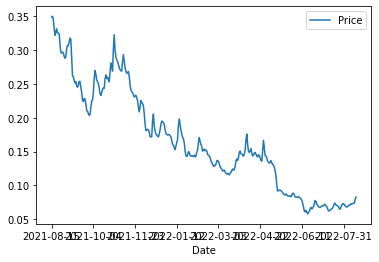

In [9]:
df.plot()

A time series whose statistical properties change over time is 
called a non-stationary time series. Thus a time series with a trend 
or seasonality is non-stationary in nature. 
This is because the presence of trend or seasonality will affect the
mean, variance and other properties at any given point in time.
Since the given plot has a trend, it can be concluded that the given
time series is not stationary.


- Plot the ACF plot of the Time series (upto 50 lags). Analyze the stationarity from ACF plot and provide reasoning (Hint: look at functions in `statsmodels` package) (1 Point)

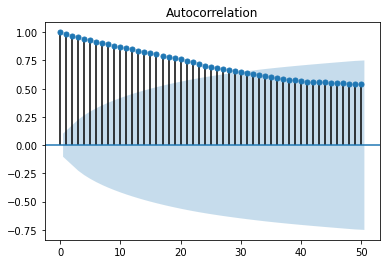

In [10]:
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=50)
plt.show()

Autocorrelation is the correlation of a signal with a delayed copy —
or a lag — of itself as a function of the delay. 
When plotting the value of the ACF for increasing lags (a plot 
called a correlogram), the values tend to degrade to zero quickly for 
stationary time series, 
While for non-stationary data the degradation will happen more 
slowly.
Since in the below ack plot the values tend to degreade to 0 slowly, 
it can be concluded that the time series is non-stationary.

### Problem 2 (2 point)

- Run Augmented Dickey Fuller Test. Analyze whether the time-series is stationary, based on ADF results (1 point)     
    
Hint: Use the `print_adf_results` function below to print the results of the ADF function cleanly after obtaining results from the library function. Pass the results from library function to `print_adf_results` function

- If not stationary, apply appropriate transformations. Run the ADF test again to show stationarity after transformation (1 Point)
      
Hint: `diff` and `dropna`. Assign the DataFrame after transformation to a new DataFrame with name `transformed_df`

In [11]:
def print_adf_results(adf_result):
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.558935
p-value: 0.504182
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
ADF Statistic: -5.593446
p-value: 0.000001
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


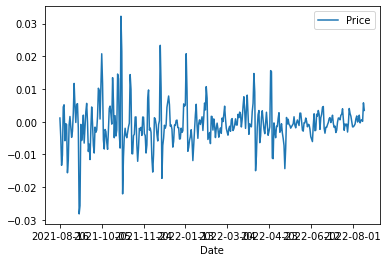

In [12]:
adf_result = adfuller(df)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
 print('\t%s: %.3f' % (key, value))
transformed_df = df.diff().dropna()
trans_adf = adfuller(transformed_df)
print_adf_results(trans_adf)
transformed_df.plot()

ADF Statistic: -9.985707
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


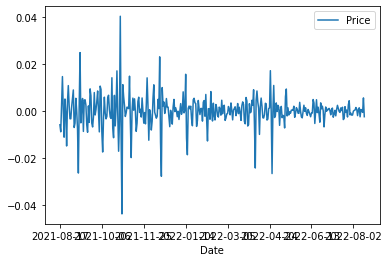

In [13]:
diff_2 = transformed_df.diff().dropna()
trans_adf_2= adfuller(diff_2)
print_adf_results(trans_adf_2)
diff_2.plot()


since the value of p remains the same after the 2nd differentiation 
hence we should conclude that the value of d = 2 however since the pvalue for the 1st order is much closer to the threshold, 
so to be conservative, we will consider d as 1 and see how the model
performs.


### Problem 3 (1 point)

- Plot both ACF and PACF plot. From these select optimal parameters for the ARIMA(p,q) model     

Hint: Negative values that are significantly outside the Confidence interval are considered significant too.        
Hint: `p+q = 3`

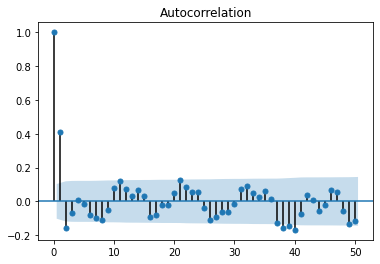

In [14]:
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()

The resulting ACF plot is shown below. We notice that there are 
significant coefficients after lag 0. In fact, they are significant up
until lag 1. 
We can see some significance around lag 2 and around lag 40, but 
this is likely due to chance, as the following coefficients are not 
significant.
hence we takr the value of q as 1


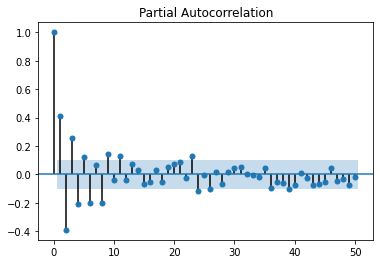

In [15]:
sm.graphics.tsa.plot_pacf(transformed_df, lags=50, method = 'ywm')
plt.show()


it is given that p + q = 3 in the question. Since q was concluded to
be 1, hence we find p using 3 - q = 2.

### Problem 4 (2 point)
- Write a function to forecast values using only AR(p) model (2 Points)     
Only use `pandas` functions and Linear Regression from `sklearn`. [LR documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)      

Hint: Create p new columns in a new DataFrame that is a copy of `transformed_df`       
Each new column has lagged value of Price. `Price_t-i` (From `Price_t-1` upto `Price_t-p`)      
Look at the `shift` function in pandas to create these new columns [Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  366
Model:                 ARIMA(2, 2, 1)   Log Likelihood                1386.624
Date:                Sat, 08 Oct 2022   AIC                          -2765.248
Time:                        15:32:57   BIC                          -2749.660
Sample:                    08-15-2021   HQIC                         -2759.053
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5818      0.045     13.008      0.000       0.494       0.669
ar.L2         -0.3485      0.039     -9.011      0.000      -0.424      -0.273
ma.L1         -0.9408      0.021    -45.423      0.000      -0.981      -0.900
sigma2      2.824e-05      1e-06     28.159      0.000    2.63e-05    3.02e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):              1283.36
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

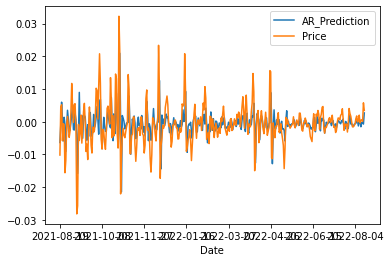

In [20]:
#Add columns for lags
arima_df = transformed_df.copy() 
#Set the value of p to an appropriate constant 
p = 2
for i in range(1,p+1):
 arima_df[f'Price_t-{i}'] = arima_df['Price'].shift(i)
 arima_df.dropna(inplace=True)
arima_df
#Separate data into x_train and y_train for linear regression 
X_train = arima_df[['Price_t-1', 'Price_t-2']].values
y_train = arima_df['Price'].values
#run a linear regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_
arima_df['AR_Prediction'] = X_train.dot(lr.coef_.T) + lr.intercept_
arima_df
arima_df.plot(y=['AR_Prediction', 'Price'])
d = 2
q = 1
model = sm.tsa.arima.ARIMA(df, order=(p,d,q))
res = model.fit()
res.summary()

Once you get predicitons like this using AR you would have to, undifference the predictions (which are differenced), but we will not deal with that here. 
For some hints on how to undifference the data to get actual predictions look [here](https://stackoverflow.com/questions/49903037/pandas-reverse-of-diff)

### Problem 5 (1 Point)

Phew! Just handling AR(2) manually required us to difference, apply regression, undifference. 
Let's make all of this much easier with a simple library function

- **Use the ARIMA function using parameters picked to forecast values (1 point)**       

Hint: Look at ARIMA function the `statstmodels`. Pass the `p,d,q` inferred from the previous tasks          
We **DO NOT** need to pass the `transformed_df` to the ARIMA function.          
Pass the orirginal `df` as input to ARIMA function, with the `d` value inferred when Transforming the df to make it stationary      
The ARIMA function automatically performs the differencing based on the `d` value passed        
Store the `.fit()` results in an object named `res`

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


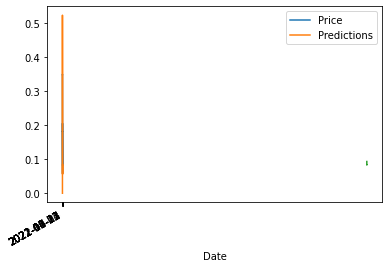

In [21]:
model = ARIMA(df, order = (2, 2, 1))
res = model.fit()
df['Predictions'] = list(res.predict(0, len(df)-1))
df.plot()
res.forecast(20).plot()

### Problem 6 (1 point)

- Evaluate the ARIMA model using Ljung Box test. Based on p-value infer if the Model shows lack of fit

Hint: Pass the `res.resid` (Residuals of the ARIMA model) as input the Ljung-Box Text.      
Pass `lags=[10]`. Set `return_df=True`
For inference, refer back to the Null and Alternate Hypotheses of Ljung-Box test. (If p value high, Null Hypothesis is significant)

In [22]:
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,49.342769,3.524425e-07
